## <center>Parte 2 - Analisando os dados </center>

Iniciamos importanto os pacotes que serão usados

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Função que dá "temas" para os gráficos plot
# Dica, coloque um nome errado que no erro ele irá listar os nomes disponiveis
plt.style.use('ggplot')

Carregamos o arquivo criado na atividade de Data Cleaning

In [25]:
df = pd.read_csv('projeto_gastos_politicos/dados_limpos.csv', parse_dates=['DATA'])

Efetuamos uma analise visual inicial para confirmar que os dados estão ok

In [26]:
df.dtypes

ANO                           int64
MES                           int64
DIA                           int64
SENADOR                      object
TIPO_DESPESA                 object
CNPJ_CPF                     object
FORNECEDOR                   object
DOCUMENTO                    object
DATA                 datetime64[ns]
DETALHAMENTO                 object
VALOR_REEMBOLSADO           float64
dtype: object

In [27]:
df.head()

,ANO,MES,DIA,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
0,2016,1,13,ACIR GURGACZ,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,2016-01-13,Despesa com pagamento de energia elétrica para...,73.60
1,2016,1,18,ACIR GURGACZ,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,2016-01-18,Pagamento de energia elétrica para o escritóri...,206.84
2,2016,1,1,ACIR GURGACZ,Aluguel,004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,2016-04-01,"Despesa com pagamento de aluguel, utilizado pa...",6000.00
3,2016,1,16,ACIR GURGACZ,Aluguel,05.423.963/0001-11,OI MÓVEL S.A.,661639001,2016-01-16,despesa com pagamento de telefonia para o escr...,407.48
4,2016,1,1,ACIR GURGACZ,Aquisição de Material,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,00608918,2016-06-01,Aquisição de publicação virtual de conteúdo jo...,550.00


In [28]:
df.describe()

,ANO,MES,DIA,VALOR_REEMBOLSADO
count,26686.0,26686.000000,26686.000000,26686.000000
mean,2016.0,6.470696,15.430938,947.520405
std,0.0,3.257154,8.846583,2734.062337
min,2016.0,1.000000,1.000000,0.010000
25%,2016.0,4.000000,8.000000,123.992500
50%,2016.0,6.000000,15.000000,324.745000
75%,2016.0,9.000000,23.000000,956.967500
max,2016.0,12.000000,31.000000,256980.000000


Avaliando a função describe, vemos dois outliers, um no mínimo e outro no máximo. Vamos identifica-los

In [29]:
# Quem tem o minimo
df[df['VALOR_REEMBOLSADO'] == df['VALOR_REEMBOLSADO'].min()]

,ANO,MES,DIA,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
6846,2016,3,22,FERNANDO BEZERRA COELHO,Passagens,07.575.651/0001-59,GOL,NFPJ4Z,2016-03-22,"Companhia Aérea: GOL, Localizador: NFPJ4Z. Pas...",0.01
6847,2016,3,30,FERNANDO BEZERRA COELHO,Passagens,07.575.651/0001-59,GOL,OEI85P,2016-03-30,"Companhia Aérea: GOL, Localizador: OEI85P. Pas...",0.01
11277,2016,6,6,JORGE VIANA,Passagens,33.937.681/0001-78,LATAM,3EY28M,2016-02-06,"Companhia Aérea: LATAM, Localizador: 3EY28M. P...",0.01
11493,2016,12,17,JORGE VIANA,Passagens,07.575.651/0001-59,GOL TRANSPORTES AÉREOS S/A,NCNMYL,2016-10-17,"Companhia Aérea: GOL, Localizador: NCNMYL. Pas...",0.01
18744,2016,6,21,PEDRO CHAVES DOS SANTOS FILHO,Passagens,12.281.922/0001-01,Via Berrini Turismo e Eventos Ltda ME,FT00020270,2016-07-21,"Companhia Aérea: AZUL, Localizador: PYZD4M. Pa...",0.01
23297,2016,3,31,TELMÁRIO MOTA,Passagens,11.489.244/0001-04,CONTINENTAL TURISMO,BGNV5G,2016-03-31,"Companhia Aérea: GOL, Localizador: BGNV5G. Pas...",0.01


In [30]:
# Quem tem o máximo
df[df['VALOR_REEMBOLSADO'] == df['VALOR_REEMBOLSADO'].max()]

,ANO,MES,DIA,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
4636,2016,12,22,DAVI ALCOLUMBRE,Divulgações,04.953.008/0001-23,ARTE & IMAGEM GRAFICA E EDITORA EIRELI ME,202,2017-03-22,NaN,256980.0


Podemos também avaliar quem são os mais gastadores. 
Primeiro, vamos somar os gastos por senador

In [31]:
# agregando o valor por senador
senadores_com_mais_gastos = df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum()

# Ordenando VALOR_REEMBOLSADO decrescentemente
senadores_com_mais_gastos = senadores_com_mais_gastos.sort_values(ascending = False)

senadores_com_mais_gastos

SENADOR
DAVI ALCOLUMBRE            510076.07
JOÃO CAPIBERIBE            502997.57
TELMÁRIO MOTA              488678.92
PAULO ROCHA                485114.40
VANESSA GRAZZIOTIN         477079.76
RANDOLFE RODRIGUES         471847.84
SÉRGIO PETECÃO             463456.45
GLADSON CAMELI             459977.83
ROMERO JUCÁ                446448.98
CIRO NOGUEIRA              440047.81
FERNANDO BEZERRA COELHO    435141.96
HUMBERTO COSTA             433763.14
ÂNGELA PORTELA             429605.98
ELMANO FÉRRER              428961.30
FERNANDO COLLOR            420471.01
JOSÉ MEDEIROS              417897.70
PAULO PAIM                 415852.91
IVO CASSOL                 415382.40
WELLINGTON FAGUNDES        415154.23
VALDIR RAUPP               415018.64
ROSE DE FREITAS            396088.44
PAULO BAUER                394455.84
OMAR AZIZ                  390372.08
JOSÉ PIMENTEL              379273.11
MAGNO MALTA                378840.79
LINDBERGH FARIAS           377653.66
ROBERTO ROCHA              364

Quem são os dez maiores gastadores?

In [32]:
senadores_com_mais_gastos.head(10)

SENADOR
DAVI ALCOLUMBRE       510076.07
JOÃO CAPIBERIBE       502997.57
TELMÁRIO MOTA         488678.92
PAULO ROCHA           485114.40
VANESSA GRAZZIOTIN    477079.76
RANDOLFE RODRIGUES    471847.84
SÉRGIO PETECÃO        463456.45
GLADSON CAMELI        459977.83
ROMERO JUCÁ           446448.98
CIRO NOGUEIRA         440047.81
Name: VALOR_REEMBOLSADO, dtype: float64

Agora em gráfico

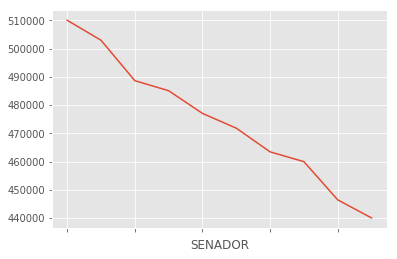

In [33]:
senadores_com_mais_gastos.head(10).plot()
plt.show() # retira mensagem de objeto da função plot(), é apenas estético.

Não dá para entender muito bem. Vamos melhorar isso com um gráfico de barras horizontal e algumas firulas.

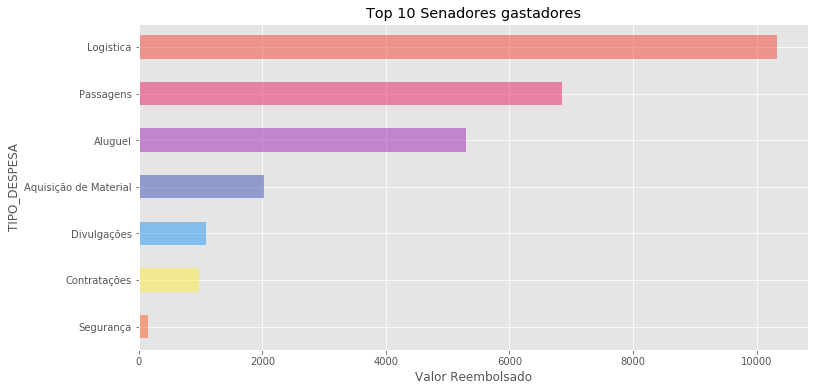

In [42]:
# Criamos um gráfico tipo barras, com grade, transparencia(alpha) e cores customizadas 
senadores_com_mais_gastos.head(10).plot(kind='barh', grid=True, alpha = 0.5, figsize = (12,6),
                                        color=['#F44336', '#E91E63', '#9C27B0', '#3F51B5',
                                               '#2196F3', '#FFEB3B', '#FF5722', '#607D8B', 
                                               '#FF9800', '#6D4C41'])
# Damos um titulo para ele
plt.title('Top 10 Senadores gastadores')

# damos um titulo para o eixo X
plt.xlabel('Valor Reembolsado')

# Invertemos o eixo Y para que os maiores fiquem por cima
plt.gca().invert_yaxis()

# salvamos a imagem em formato png
plt.savefig('top_10_senadores.png')

plt.show()

**Dica**: o site [Flat UI Colors](https://flatuicolors.com/) possui dicas de paletas para configuração de plots

Vamos avaliar agora os gastos por tipo de despesa

In [35]:
# agregando a quantidade de reembolsos por tipo
tipos_com_mais_gastos = df.groupby('TIPO_DESPESA')['VALOR_REEMBOLSADO'].count()

# Ordenando VALOR_REEMBOLSADO decrescentemente
senadores_com_mais_gastos = tipos_com_mais_gastos.sort_values(ascending = False)

senadores_com_mais_gastos

TIPO_DESPESA
Logistica                10323
Passagens                 6852
Aluguel                   5292
Aquisição de Material     2024
Divulgações               1083
Contratações               968
Segurança                  144
Name: VALOR_REEMBOLSADO, dtype: int64

Vamos visualizar isso também, com seaborn dessa vez. Perceba que não é necessário utilizar a variavel criada, pois o seaborn já efetua a agregação de COUNT

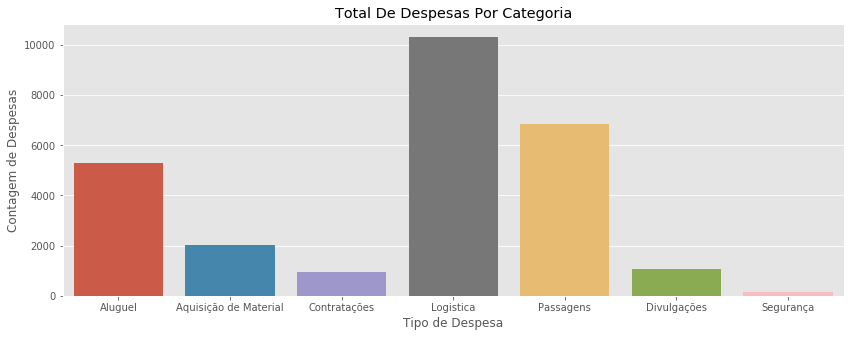

In [43]:
# Definindo um tamanho melhor para visualização
plt.figure(figsize=(14,5))

# Contagem de despesas
sns.countplot(x=df['TIPO_DESPESA'])

# Dando titulo para o plot
plt.title(str.title('total de despesas por categoria')) # str.title da letra maiuscula para a primeira letra de cada palavra

# Dando nome para os labels
plt.ylabel('Contagem de Despesas')
plt.xlabel('Tipo de Despesa')

# renomeado
plt.show()

Vamos visualizar outros tipos de gráficos que podemos usar. Como por exemplo, o heatmap

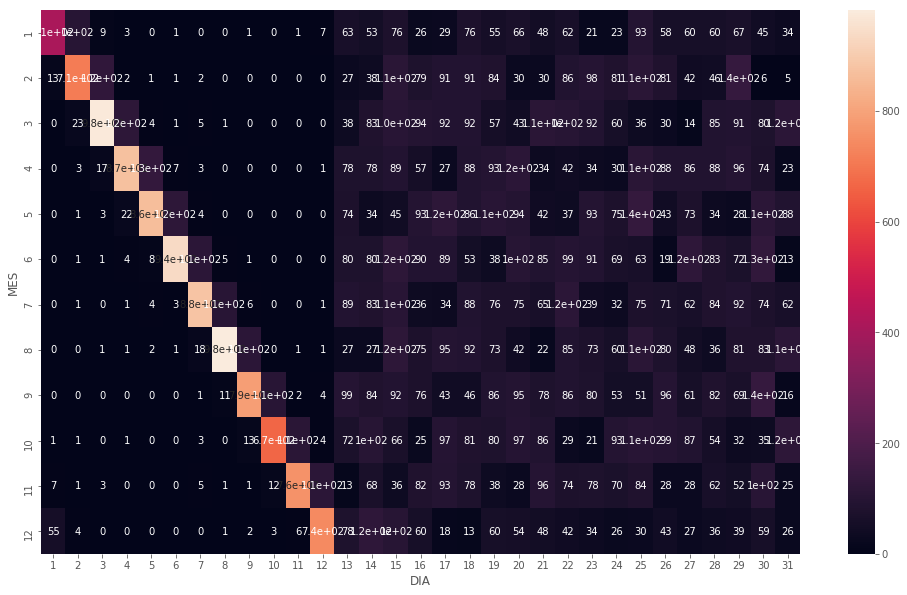

DIA,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
MES,,,,,,,,,,,,,,,,,,,,,
1,413,100,9,3,0,1,0,0,1,0,...,62,21,23,93,58,60,60,67,45,34
2,13,712,124,2,1,1,2,0,0,0,...,86,98,81,108,81,42,46,141,6,5
3,0,23,976,118,4,1,5,1,0,0,...,103,92,60,36,30,14,85,91,80,115
4,0,3,17,871,133,7,3,0,0,0,...,42,34,30,110,88,86,88,96,74,23
5,0,1,3,22,864,118,4,0,0,0,...,37,93,75,136,43,73,34,28,113,88
6,0,1,1,4,8,936,114,5,1,0,...,99,91,69,63,19,119,83,72,130,13
7,0,1,0,1,4,3,879,106,6,0,...,115,39,32,75,71,62,84,92,74,62
8,0,0,1,1,2,1,18,982,114,0,...,85,73,60,110,80,48,36,81,83,114
9,0,0,0,0,0,0,1,11,787,106,...,86,80,53,51,96,61,82,69,139,16


In [57]:
# Criando um data-frame pivotado para verificarmos a correlação
# Definimos as linhas com index, as colunas com columns, o valor que sera correlacionado com values, a função de agregação
# com aggfunc e definimos valores nulos como zero com fill_value
df_pivoted = df.pivot_table(index='MES', columns='DIA', values='VALOR_REEMBOLSADO', aggfunc=np.count_nonzero, fill_value=0)

plt.figure(figsize=(17,10))
sns.heatmap(df_pivoted, annot=True)

plt.show()

df_pivoted

Há uma falha nos dados, pois o campo MES está errado. Vamos corrigi-lo

In [70]:
# Identificando que o campo mês está errado ao visualizar a tabela
# Algumas datas com mes 06 estão registrados com mes 02
df[(df['MES'] == 2) & (df['DIA'] == 2)]

,ANO,MES,DIA,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
16,2016,2,2,ACIR GURGACZ,Aluguel,004.948.028-63,GILBERTO PISELO DO NASCIMENTO,002/16,2016-03-02,"Despesa com pagamento de aluguel, utilizado co...",6000.00
17,2016,2,2,ACIR GURGACZ,Aluguel,05.423.963/0001-11,OI MÓVEL S.A.,667792742,2016-06-02,Pagamento de telefone fixo e móvel para uso do...,439.96
18,2016,2,2,ACIR GURGACZ,Aquisição de Material,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,00611186,2016-02-02,Aquisição de publicação virtual de conteúdo jo...,550.00
20,2016,2,2,ACIR GURGACZ,Logistica,34.274.233/0097-46,PETROBRAS DISTRIBUIDORA,000574061,2016-11-02,Despesa com aquisição de combustível para abas...,1308.48
25,2016,2,2,ACIR GURGACZ,Passagens,17.872.428/0001-27,AMERICA VIAGENS E TURISMO LTDA - ME,YKLXQ8,2016-01-02,"Companhia Aérea: TAM, Localizador: YKLXQ8. Pas...",1655.00
152,2016,2,2,AÉCIO NEVES,Aluguel,18.007.971/0001-29,ASAMAR S A,2236587,2016-04-02,IPTU referente ao mês de fevereiro de 2016.,904.54
156,2016,2,2,AÉCIO NEVES,Aluguel,70.943.345/0001-64,CONDOMINIO DO EDIFICIO ASAMAR,9010022016,2016-05-02,"CEMIG, referente a fevereiro de 2016.",2551.97
157,2016,2,2,AÉCIO NEVES,Aluguel,02.059.753/0001-06,EMIVE PATRULHA 24 HORAS LTDA,2016/20033,2016-04-02,Vigilância patrimonial referente a fevereiro d...,213.70
162,2016,2,2,AÉCIO NEVES,Aquisição de Material,60.579.703/0001-48,EMPRESA FOLHA DA MANHÃ S/A,22155767-001,2016-04-02,Assinatura de jornal.,177.90
163,2016,2,2,AÉCIO NEVES,Aquisição de Material,60.579.703/0001-48,EMPRESA FOLHA DA MANHÃ S/A,22155767001,2016-04-02,Assinatura de jornal.,177.90


In [73]:
# corrigindo valores de mês da coluna MES
df['MES'] = df['DATA'].dt.strftime('%m')
df.head()

,ANO,MES,DIA,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
0,2016,01,13,ACIR GURGACZ,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,2016-01-13,Despesa com pagamento de energia elétrica para...,73.60
1,2016,01,18,ACIR GURGACZ,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,2016-01-18,Pagamento de energia elétrica para o escritóri...,206.84
2,2016,04,1,ACIR GURGACZ,Aluguel,004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,2016-04-01,"Despesa com pagamento de aluguel, utilizado pa...",6000.00
3,2016,01,16,ACIR GURGACZ,Aluguel,05.423.963/0001-11,OI MÓVEL S.A.,661639001,2016-01-16,despesa com pagamento de telefonia para o escr...,407.48
4,2016,06,1,ACIR GURGACZ,Aquisição de Material,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,00608918,2016-06-01,Aquisição de publicação virtual de conteúdo jo...,550.00


Agora vamos recriar o heatmap e ver a diferença

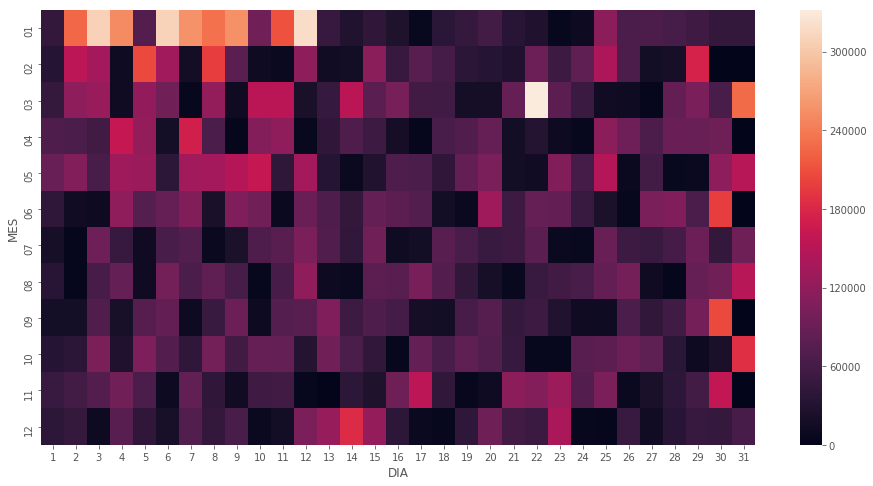

DIA,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
MES,,,,,,,,,,,,,,,,,,,,,
01,45020.71,226648.43,308679.54,251495.55,71847.95,310404.93,256814.45,232785.61,256293.38,94968.23,...,28056.78,5549.24,10638.37,115948.24,65404.43,66814.78,61993.90,55574.95,44257.90,45329.37
02,32858.96,154039.24,133983.36,11746.49,205309.58,132230.31,15629.05,197533.59,78155.12,12707.89,...,91045.00,54108.73,82948.83,141378.67,66755.09,15694.31,20472.12,175175.00,0.00,0.00
03,45870.41,118905.18,126774.96,13181.04,120930.86,95319.10,6429.52,123122.47,13178.45,152470.75,...,331864.95,80010.85,50845.56,15120.25,12598.34,4714.09,84472.78,103471.81,63522.11,228164.15
04,68693.78,65644.23,57984.77,160950.59,122071.69,17369.04,171603.04,65041.65,4511.07,110882.40,...,31572.52,10752.07,6299.06,117349.48,93512.58,67275.97,89965.53,89340.60,92649.27,0.00
05,89349.60,109722.30,64432.50,131235.43,127431.81,39593.20,132863.04,134634.78,147939.69,161167.96,...,14955.20,108331.00,60446.21,147045.58,9493.10,58347.91,7085.90,8312.10,118284.87,150035.50
06,41162.55,15332.53,11004.48,120385.10,73654.32,86942.03,108514.38,22963.57,107118.01,96975.95,...,87774.23,84592.47,49864.44,23710.29,6429.83,103421.58,106978.50,65541.74,198225.62,0.00
07,20025.63,3951.54,94289.46,49252.54,13511.17,63559.68,71290.45,9858.09,24221.95,67812.33,...,77927.21,7843.30,6735.66,89178.74,54177.71,49804.64,60349.24,90777.80,44674.21,93276.58
08,36068.47,5099.02,62860.55,85980.52,13847.90,97634.05,65578.23,82893.94,62036.14,6191.63,...,49965.21,57657.10,63582.54,84550.13,98968.94,13623.14,5139.19,87762.21,96835.93,149101.52
09,16935.99,17042.54,68709.01,20992.39,75038.90,85305.42,11430.94,49564.87,91627.98,10406.22,...,53424.28,29399.05,13397.89,12945.93,65372.36,43462.53,56247.73,99786.57,204948.87,0.00


In [94]:
# Criando um data-frame pivotado para verificarmos a correlação
# Definimos as linhas com index, as colunas com columns, o valor que sera correlacionado com values, a função de agregação
# com aggfunc e definimos valores nulos como zero com fill_value
df_pivoted = df.pivot_table(index='MES', columns='DIA', values='VALOR_REEMBOLSADO', aggfunc=np.sum, fill_value=0)

plt.figure(figsize=(16,8))
sns.heatmap(df_pivoted, fmt = 'f') #fmt D força os itens como inteiros

plt.show()

df_pivoted

Vamos visualizar agora um heatmap de tipo_despesa com meses

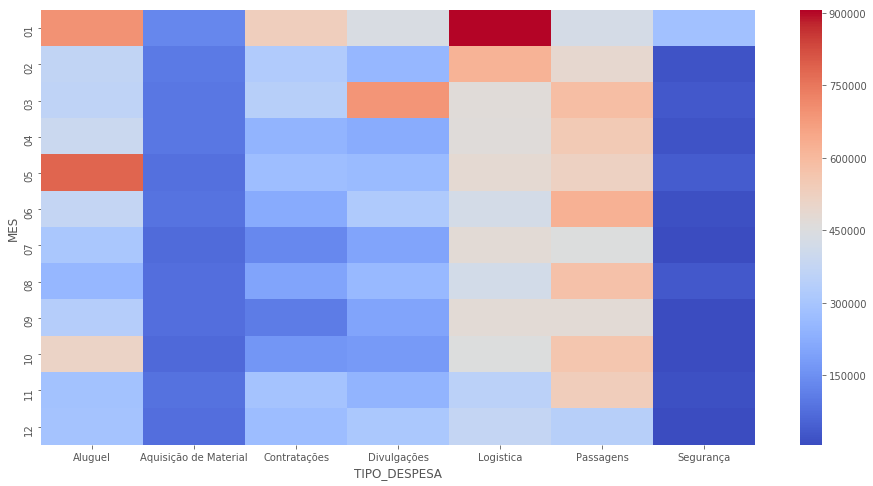

TIPO_DESPESA,Aluguel,Aquisição de Material,Contratações,Divulgações,Logistica,Passagens,Segurança
MES,,,,,,,
01,698102.25,131487.53,530205.27,439916.30,905969.45,426747.06,284426.09
02,369595.03,103897.52,322843.29,252818.74,620300.63,488402.19,21832.40
03,362194.19,94986.41,343268.30,689365.97,466975.73,589368.50,33859.82
04,395143.43,95314.00,243225.69,224044.85,464549.14,550245.08,21978.24
05,784870.17,80766.86,275629.88,263856.45,482980.51,520546.83,39480.96
06,377622.54,90153.46,219292.74,320627.83,423797.97,624657.12,13873.95
07,307455.14,69549.31,136238.66,200566.67,475925.29,453981.12,7124.31
08,253504.86,78291.64,202764.55,259752.60,420530.73,578393.33,34069.32
09,336136.45,78875.75,107722.85,202540.90,474435.66,474782.57,9194.48


In [106]:
# Criando um data-frame pivotado para verificarmos a correlação
# Definimos as linhas com index, as colunas com columns, o valor que sera correlacionado com values, a função de agregação
# com aggfunc e definimos valores nulos como zero com fill_value
df_pivoted = df.pivot_table(index='MES', columns='TIPO_DESPESA', values='VALOR_REEMBOLSADO', aggfunc=np.sum, fill_value=0)

plt.figure(figsize=(16,8))
# existem paletes de cores prontas na ferramenta seaborn, podendo ser selecionadas com o parametro cmap
sns.heatmap(df_pivoted, fmt = 'f', cmap='coolwarm') 

plt.show()

df_pivoted

Um pequeno desvio para falar sobre a função loc, que permite localizar linhas. Veja como ela pode ser usada:

In [96]:
df.loc[df['DATA'] == '1977-10-10']

,ANO,MES,DIA,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
17924,2016,10,10,PAULO PAIM,Logistica,37.063.328/0030-00,Auto Shopping Derivados de Petroleo Ltda,621942,1977-10-10,Aquisição de combustível para veículos utiliza...,152.51


Vamos alterar essa data para demonstrar como fazer isso com loc

In [100]:
df.loc[df['DATA'] == '1977-10-10', 'ANO'] = 1977
df.loc[df['DATA'] == '1977-10-10']

,ANO,MES,DIA,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
17924,1977,10,10,PAULO PAIM,Logistica,37.063.328/0030-00,Auto Shopping Derivados de Petroleo Ltda,621942,1977-10-10,Aquisição de combustível para veículos utiliza...,152.51


Vamos avaliar os gastos por tipo de despesa